In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

In [2]:
강원 = pd.read_csv('C:/Users/user/Desktop/교통사고/빅데이터인턴분석자료통합버전_강원.csv', encoding='CP949')

In [3]:
강원.shape

(41121, 58)

In [4]:
강원.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41121 entries, 0 to 41120
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사고번호          41121 non-null  int64 
 1   발생일시          41121 non-null  int64 
 2   발생지_시도        41121 non-null  object
 3   발생지_시군구       41121 non-null  object
 4   법정동코드         41121 non-null  int64 
 5   요일            41121 non-null  object
 6   주야            41121 non-null  object
 7   사고내용          41121 non-null  object
 8   사고유형_대분류      41121 non-null  object
 9   사고유형_중분류      41121 non-null  object
 10  사고유형          41121 non-null  object
 11  가해자성별         41121 non-null  object
 12  피해자성별         41121 non-null  object
 13  연령가해자         41121 non-null  object
 14  연령피해자         41121 non-null  object
 15  가해자음주_대분류     41121 non-null  object
 16  가해자음주         41121 non-null  object
 17  보호장구가해자_대분류   41121 non-null  object
 18  보호장구가해자       41121 non-null  object
 19  보호장구

In [5]:
강원.연령피해자.unique()

array(['51세', '불명', '54세', '37세', '44세', '72세', '13세', '48세', '47세',
       '53세', '57세', '40세', '36세', '45세', '35세', '33세', '58세', '39세',
       '68세', '50세', '21세', '62세', '17세', '29세', '23세', '30세', '75세',
       '60세', '19세', '38세', '43세', '46세', '20세', '8세', '41세', '52세',
       '84세', '70세', '49세', '34세', '32세', '18세', '56세', '26세', '89세',
       '85세', '67세', '80세', '28세', '78세', '42세', '24세', '55세', '31세',
       '76세', '61세', '59세', '73세', '69세', '27세', '71세', '22세', '66세',
       '65세', '16세', '4세', '88세', '9세', '63세', '10세', '14세', '15세', '64세',
       '74세', '5세', '79세', '7세', '25세', '81세', '11세', '95세', '77세', '6세',
       '83세', '86세', '1세', '92세', '82세', '93세', '3세', '87세', '94세', '12세',
       '90세', '98세', '2세', '91세', '96세', '97세', '99세', '100세', '없음'],
      dtype=object)

In [6]:
강원.loc[(강원['연령피해자']=='불명')|(강원['연령피해자']=='없음'),'연령피해자'] = 50

In [7]:
강원['피해자연령'] = 강원['연령피해자'].str[:-1]
강원['피해자연령']

0         51
1        NaN
2         54
3         37
4         44
        ... 
41116     52
41117     67
41118     47
41119     51
41120     35
Name: 피해자연령, Length: 41121, dtype: object

In [8]:
강원 = 강원.dropna(subset=['피해자연령'])

In [9]:
강원.head()

,사고번호,발생일시,발생지_시도,발생지_시군구,법정동코드,요일,주야,사고내용,사고유형_대분류,사고유형_중분류,...,노면상태_대분류,노면상태,교차로형태_대분류,교차로형태,사망자수,중상자수,경상자수,부상신고자수,사고위치폴리곤,피해자연령
0,2015010100100019,2015010100,강원,춘천시,4211031022,목,야,중상,차대차,측면충돌,...,포장,건조,교차로,교차로 - 사지,0,1,3,0,"POLYGON((1023551 1986551,1023551 1986600,10236...",51
2,2015010200100075,2015010208,강원,춘천시,4211012400,금,주,경상,차대차,추돌,...,포장,건조,교차로,교차로 - 사지,0,0,2,0,"POLYGON((1021101 1984151,1021101 1984200,10211...",54
3,2015010200100205,2015010213,강원,춘천시,4211012100,금,주,경상,차대차,추돌,...,포장,건조,교차로아님,교차로아님,0,0,1,0,"POLYGON((1019201 1985201,1019201 1985250,10192...",37
4,2015010200100417,2015010220,강원,춘천시,4211012100,금,야,경상,차대차,측면충돌,...,포장,건조,교차로,교차로 - 사지,0,0,1,0,"POLYGON((1019551 1984451,1019551 1984500,10196...",44
5,2015010300100210,2015010312,강원,춘천시,4211012000,토,주,경상,차대차,측면충돌,...,포장,건조,교차로,교차로 - 사지,0,0,1,0,"POLYGON((1021901 1987201,1021901 1987250,10219...",72


In [10]:
강원['피해자연령'] = 강원['피해자연령'].astype('int')

In [11]:
강원피고령 = 강원.loc[강원['피해자연령']>=65]
강원피어린 = 강원.loc[강원['피해자연령']<=13]

In [23]:
len(강원피고령),len(강원피어린)

(2092, 723)

In [13]:
강원피고령['발생일시'] = 강원피고령['발생일시'].astype('str')
강원피어린['발생일시'] = 강원피어린['발생일시'].astype('str')

<ipython-input-13-631060ecf2f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  강원피고령['발생일시'] = 강원피고령['발생일시'].astype('str')
<ipython-input-13-631060ecf2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  강원피어린['발생일시'] = 강원피어린['발생일시'].astype('str')


In [14]:
강원피고령['발생년도'] = 강원피고령['발생일시'].str[0:4]
강원피어린['발생년도'] = 강원피어린['발생일시'].str[0:4]

<ipython-input-14-2c578fdc0073>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  강원피고령['발생년도'] = 강원피고령['발생일시'].str[0:4]
<ipython-input-14-2c578fdc0073>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  강원피어린['발생년도'] = 강원피어린['발생일시'].str[0:4]


In [15]:
강원피고령.shape

(5701, 60)

In [16]:
강원피어린.shape

(944, 60)

In [17]:
강원피고령 = 강원피고령.loc[강원피고령['사고유형_대분류']=='차대사람']
강원피어린 = 강원피어린.loc[강원피어린['사고유형_대분류']=='차대사람']

In [18]:
강원피고령['빈도계산용'] = 1
강원피고령_빈도 = 강원피고령.groupby('발생년도').빈도계산용.sum()

강원피어린['빈도계산용'] = 1
강원피어린_빈도 = 강원피어린.groupby('발생년도').빈도계산용.sum()

In [19]:
label = ['2015','2016','2017','2018','2019']
index = np.arange(len(label))
index

array([0, 1, 2, 3, 4])

In [20]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

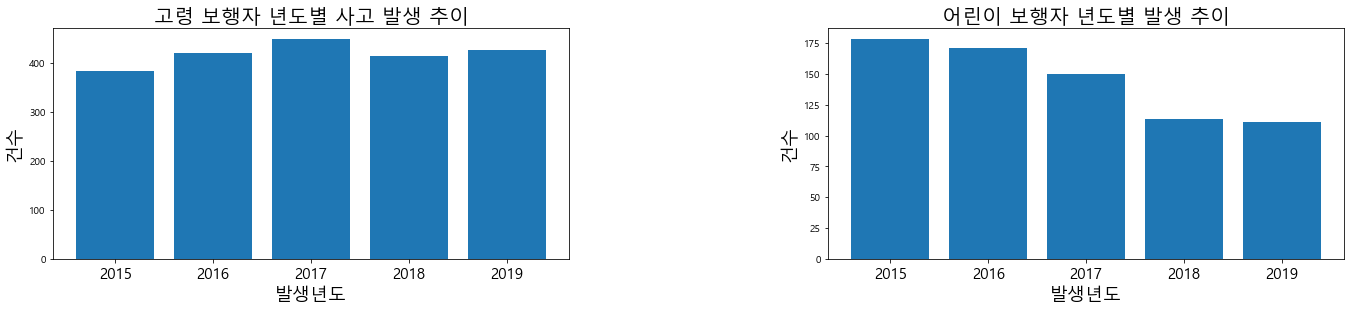

In [24]:
plt.subplot(121)
plt.bar(index, 강원피고령_빈도)
plt.title('고령 보행자 년도별 사고 발생 추이', fontsize=20)
plt.xlabel('발생년도', fontsize=18)
plt.ylabel('건수', fontsize=18)
plt.xticks(index, label, fontsize=15)

plt.subplot(122)
plt.bar(index, 강원피어린_빈도)
plt.title('어린이 보행자 년도별 발생 추이', fontsize=20)
plt.xlabel('발생년도', fontsize=18)
plt.ylabel('건수', fontsize=18)
plt.xticks(index, label, fontsize=15)

plt.subplots_adjust(left=0.01, bottom=0.1,  right=3, top=0.9, wspace=0.5, hspace=0.35)
plt.show()

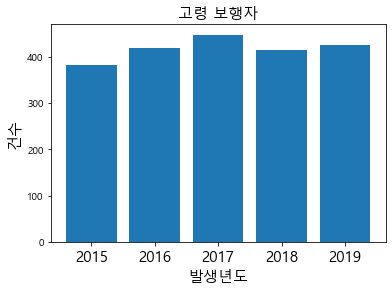

In [33]:
plt.bar(index, 강원피고령_빈도)
plt.title('고령 보행자', fontsize=15)
plt.xlabel('발생년도', fontsize=15)
plt.ylabel('건수', fontsize=15)
plt.xticks(index, label, fontsize=15)
plt.savefig('강원 고령 보행자 추세.png', dpi = 300)

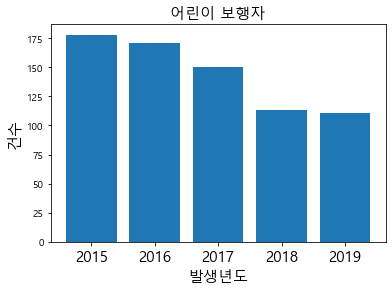

In [34]:
plt.bar(index, 강원피어린_빈도)
plt.title('어린이 보행자', fontsize=15)
plt.xlabel('발생년도', fontsize=15)
plt.ylabel('건수', fontsize=15)
plt.xticks(index, label, fontsize=15)
plt.savefig('강원 어린이 보행자 추세.png', dpi = 300)

In [71]:
강원피고령_요일별 = 강원피어린.groupby('요일').빈도계산용.sum()
강원피고령_요일별

요일
금    143
목     94
수    103
월    105
일     58
토    110
화    110
Name: 빈도계산용, dtype: int64

In [75]:
강원피고령_요일별 = pd.DataFrame({'요일':['월','화','수','목','금','토','일'],'건수':[105,110,103,94,143,110,58]})

In [68]:
import seaborn as sns

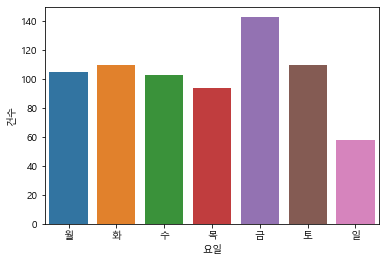

<Figure size 432x288 with 0 Axes>

In [81]:
sns.barplot(data=강원피고령_요일별, x='요일',y='건수')
plt.show()
plt.savefig('요일별 빈도.png')

In [83]:
강원피어린_보호 = 강원피어린.groupby('어린이보호구역_여부').빈도계산용.sum()

In [84]:
강원피어린_보호

어린이보호구역_여부
아니오    669
예       54
Name: 빈도계산용, dtype: int64

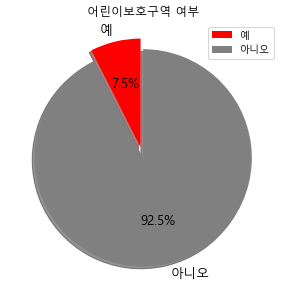

In [120]:
labels = ['예','아니오']
freq = [54, 669]
colors = ['red','grey']
plt.figure(figsize=(5,5))
plt.pie(freq, explode = (0.1,0),
        labels = labels, autopct='%1.1f%%',
       shadow = True, startangle = 90,
       textprops = {'fontsize':13}, colors = colors)
plt.title('어린이보호구역 여부')
plt.legend(labels=labels, loc='upper right')
plt.savefig('어린이 여부.png')

In [87]:
강원피고령_보호 = 강원피고령.groupby('노인보호구역_여부').빈도계산용.sum()
강원피고령_보호

노인보호구역_여부
아니오    2091
예         1
Name: 빈도계산용, dtype: int64

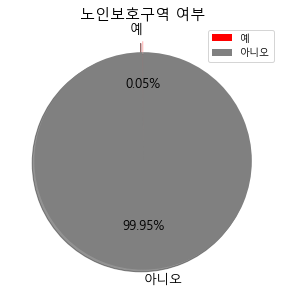

In [127]:
labels = ['예','아니오']
freq = [1, 2091]
colors = ['red','grey']
plt.figure(figsize=(5,5))
plt.pie(freq, explode = (0.1,0),
        labels = labels, autopct='%1.2f%%',
       shadow = True, startangle = 90,
       textprops = {'fontsize':13}, colors = colors)
plt.legend(labels=labels, loc='upper right')
plt.title('노인보호구역 여부', fontsize=15)
plt.savefig('노인보호구역 여부.png')

In [131]:
강원피고령.신체상해정도피해자.unique()
강원피고령_상해 = 강원피고령.groupby('신체상해정도피해자').빈도계산용.sum()
강원피고령_상해

신체상해정도피해자
경상       667
부상신고      64
사망       190
상해없음       2
중상      1169
Name: 빈도계산용, dtype: int64

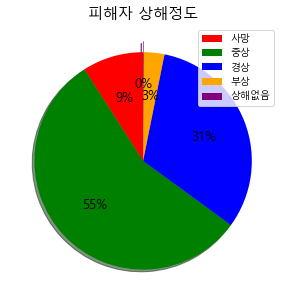

In [146]:
labels = ['사망','중상','경상','부상','상해없음']
freq = [190, 1169, 667, 64, 2]
colors = ['red','green','blue','orange','purple']
plt.figure(figsize=(5,5))
plt.pie(freq, explode = (0,0,0,0,0.1),
        autopct='%1d%%',
       shadow = True, startangle = 90,
       textprops = {'fontsize':13}, colors=colors)
plt.legend(labels=labels, loc='upper right')
plt.title('피해자 상해정도', fontsize=15)
plt.savefig('피해자 상해정도.png')

In [147]:
강원피고령.발생지_시군구.unique()

array(['춘천시', '강릉시', '원주시', '양양군', '속초시', '삼척시', '영월군', '홍천군', '평창군',
       '태백시', '정선군', '횡성군', '고성군', '철원군', '양구군', '동해시', '화천군', '인제군'],
      dtype=object)

In [182]:
강원피고령_지역 = 강원피고령.groupby('발생지_시군구').빈도계산용.sum()
강원피고령_지역 = 강원피고령_지역.sort_values(ascending = False)
지역 = 강원피고령_지역.index
지역_건수 = 강원피고령_지역.values
지역 = list(지역)
지역_건수 = list(지역_건수)
지역, 지역_건수

(['원주시',
  '춘천시',
  '강릉시',
  '동해시',
  '속초시',
  '홍천군',
  '삼척시',
  '태백시',
  '영월군',
  '평창군',
  '횡성군',
  '철원군',
  '정선군',
  '양양군',
  '고성군',
  '양구군',
  '인제군',
  '화천군'],
 [435,
  380,
  327,
  144,
  127,
  106,
  97,
  78,
  58,
  57,
  54,
  50,
  43,
  42,
  32,
  29,
  17,
  16])

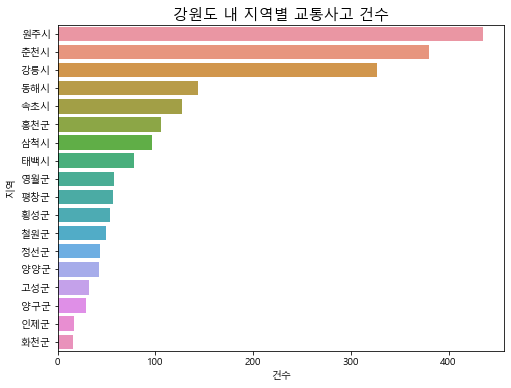

In [196]:
강원피고령_지역 = pd.DataFrame({'지역':지역,'건수':지역_건수})
sns.barplot(data=강원피고령_지역, x='건수',y='지역')
plt.rcParams['figure.figsize'] = [9, 6]
plt.title('강원도 내 지역별 교통사고 건수', fontsize=15)
# plt.show() # plt.show()를 할 경우, savefig 단계에서 그래프가 저장이 안 되는 경우가 발생.
plt.savefig('강원도 내 지역별 교통사고 건수.png')

In [197]:
강원피고령_주야 = 강원피고령.groupby('주야').빈도계산용.sum()
강원피고령_주야

주야
야     584
주    1508
Name: 빈도계산용, dtype: int64

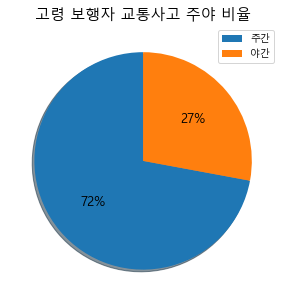

In [199]:
labels = ['주간','야간']
freq = [1508, 584]
plt.figure(figsize=(5,5))
plt.pie(freq,
        autopct='%1d%%',
       shadow = True, startangle = 90,
       textprops = {'fontsize':13})
plt.legend(labels=labels, loc='upper right')
plt.title('고령 보행자 교통사고 주야 비율', fontsize=15)
plt.savefig('고령 보행자 교통사고 주야 비율.png')

In [218]:
columns = 강원피고령.columns
columns = list(columns)
columns = columns[6:]
강원피고령.loc[:,columns]

,주야,사고내용,사고유형_대분류,사고유형_중분류,사고유형,가해자성별,피해자성별,연령가해자,연령피해자,가해자음주_대분류,...,교차로형태_대분류,교차로형태,사망자수,중상자수,경상자수,부상신고자수,사고위치폴리곤,피해자연령,발생년도,빈도계산용
19,주,경상,차대사람,보도통행중,보도통행중,여,여,18세,68세,기타불명,...,교차로아님,교차로아님,0,0,1,0,"POLYGON((1018851 1986001,1018851 1986050,10189...",68,2015,1
34,주,중상,차대사람,횡단중,횡단중,남,여,80세,75세,기타불명,...,교차로아님,교차로아님,0,1,0,0,"POLYGON((1019751 1987601,1019751 1987650,10198...",75,2015,1
61,야,경상,차대사람,길가장자리구역통행중,길가장자리구역통행중,남,남,18세,68세,기타불명,...,교차로아님,교차로아님,0,0,1,0,"POLYGON((1018201 1985001,1018201 1985050,10182...",68,2015,1
76,주,중상,차대사람,길가장자리구역통행중,길가장자리구역통행중,남,여,22세,89세,기타불명,...,교차로아님,교차로아님,0,1,0,0,"POLYGON((1022751 1985301,1022751 1985350,10228...",89,2015,1
77,주,중상,차대사람,횡단중,횡단중,여,여,45세,85세,기타불명,...,교차로아님,교차로아님,0,1,0,0,"POLYGON((1019601 1984251,1019601 1984300,10196...",85,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41069,주,중상,차대사람,횡단중,횡단중,남,여,44세,87세,해당 없음,...,교차로,교차로 - 삼지,0,1,0,0,"POLYGON((1087301 1909901,1087301 1909950,10873...",87,2019,1
41071,주,중상,차대사람,기타,기타,남,여,51세,85세,해당 없음,...,교차로아님,교차로아님,0,1,0,0,"POLYGON((1072801 1909451,1072801 1909500,10728...",85,2019,1
41072,주,부상신고,차대사람,차도통행중,차도통행중,여,남,59세,70세,해당 없음,...,교차로,교차로 - 사지,0,0,0,1,"POLYGON((1085901 1909801,1085901 1909850,10859...",70,2019,1
41088,주,중상,차대사람,횡단중,횡단중,여,여,58세,81세,해당 없음,...,교차로아님,교차로아님,0,1,0,0,"POLYGON((1085551 1909851,1085551 1909900,10856...",81,2019,1


In [222]:
강원피고령_사고유형 = 강원피고령.groupby('사고유형').빈도계산용.sum()
강원피고령_사고유형 = 강원피고령_사고유형.sort_values(ascending = False)
사고유형 = 강원피고령_사고유형.index
사고유형_건수 = 강원피고령_사고유형.values
사고유형 = list(사고유형)
사고유형_건수 = list(사고유형_건수)
사고유형, 사고유형_건수

(['횡단중', '기타', '길가장자리구역통행중', '차도통행중', '보도통행중'], [1165, 436, 218, 190, 83])

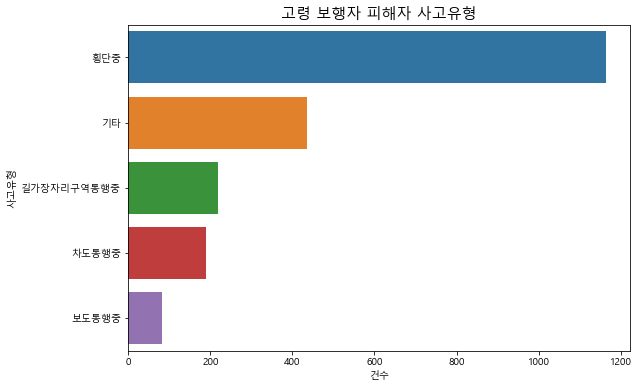

In [229]:
강원피고령_사고유형 = pd.DataFrame({'사고유형':사고유형,'건수':사고유형_건수})
sns.barplot(data=강원피고령_사고유형, x='건수',y='사고유형')
plt.rcParams['figure.figsize'] = [9, 6]
plt.title('고령 보행자 피해자 사고유형', fontsize=15)
# plt.show() # plt.show()를 할 경우, savefig 단계에서 그래프가 저장이 안 되는 경우가 발생.
plt.savefig('고령 보행자 피해자 사고유형.png')

In [231]:
강원피고령.법규위반가해자.unique()

array(['안전운전 의무 불이행', '보행자 보호의무 위반', '기타', '중앙선 침범', '교차로 통행방법 위반',
       '신호위반', '과속', '안전거리 미확보'], dtype=object)

In [233]:
강원피고령_법규 = 강원피고령.groupby('법규위반가해자').빈도계산용.sum()
강원피고령_법규 = 강원피고령_법규.sort_values(ascending = False)
법규 = 강원피고령_법규.index
법규_건수 = 강원피고령_법규.values
법규 = list(법규)
법규_건수 = list(법규_건수)
법규, 법규_건수

(['안전운전 의무 불이행',
  '보행자 보호의무 위반',
  '기타',
  '신호위반',
  '중앙선 침범',
  '교차로 통행방법 위반',
  '과속',
  '안전거리 미확보'],
 [1487, 427, 65, 57, 18, 18, 18, 2])

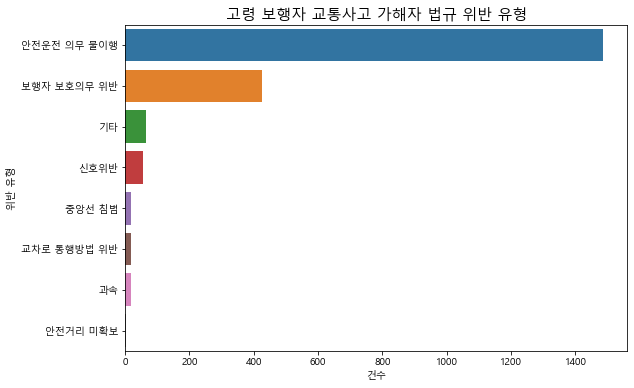

In [235]:
강원피고령_법규 = pd.DataFrame({'위반 유형':법규,'건수':법규_건수})
sns.barplot(data=강원피고령_법규, x='건수',y='위반 유형')
plt.rcParams['figure.figsize'] = [9, 6]
plt.title('고령 보행자 교통사고 가해자 법규 위반 유형', fontsize=15)
# plt.show() # plt.show()를 할 경우, savefig 단계에서 그래프가 저장이 안 되는 경우가 발생.
plt.savefig('고령 보행자 교통사고 가해자 법규 위반 유형.png')

In [241]:
강원피고령['발생시간'] = 강원피고령['피해자연령'].astype('str')
강원피고령['발생시간'] = 강원피고령['발생일시'].str[-2:]
강원피고령['발생시간']

19       15
34       09
61       19
76       11
77       12
         ..
41069    11
41071    10
41072    10
41088    17
41095    18
Name: 발생시간, Length: 2092, dtype: object

In [243]:
강원피고령_발생시간 = 강원피고령.groupby('발생시간').빈도계산용.sum()
강원피고령_발생시간 = 강원피고령_발생시간.sort_index(ascending = True)
발생시간 = 강원피고령_발생시간.index
발생시간_건수 = 강원피고령_발생시간.values
발생시간 = list(발생시간)
발생시간_건수 = list(발생시간_건수)
발생시간, 발생시간_건수

(['00',
  '01',
  '02',
  '03',
  '04',
  '05',
  '06',
  '07',
  '08',
  '09',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23'],
 [5,
  1,
  10,
  5,
  17,
  40,
  63,
  44,
  114,
  139,
  161,
  138,
  146,
  138,
  148,
  137,
  121,
  159,
  193,
  130,
  90,
  51,
  28,
  14])

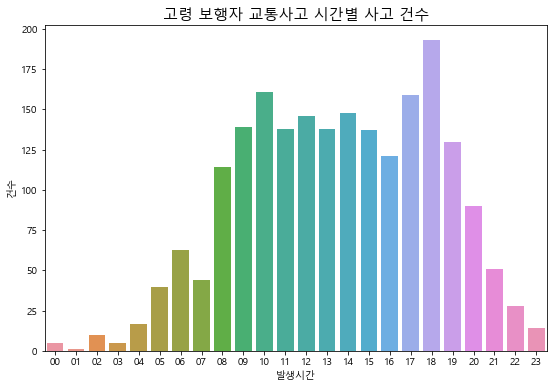

In [245]:
강원피고령_발생시간 = pd.DataFrame({'발생시간':발생시간,'건수':발생시간_건수})
sns.barplot(data=강원피고령_발생시간, x='발생시간',y='건수')
plt.rcParams['figure.figsize'] = [9, 6]
plt.title('고령 보행자 교통사고 시간별 사고 건수', fontsize=15)
# plt.show() # plt.show()를 할 경우, savefig 단계에서 그래프가 저장이 안 되는 경우가 발생.
plt.savefig('고령 보행자 교통사고 발생시간별 건수.png')